solve_ivp_cupy took 2.984945058822632s
solve_ivp_cupy (with numpy t_eval) took 2.5548312664031982s
solve_ivp_cupy (with cupy t) took 2.6296026706695557s
odeint took 0.020004749298095703s
scipy.solve_ivp took 0.03400754928588867s
scipy.solve_ivp (with t_eval) took 0.05001187324523926s
scipy.solve_ivp with LSODA took 0.05901503562927246s


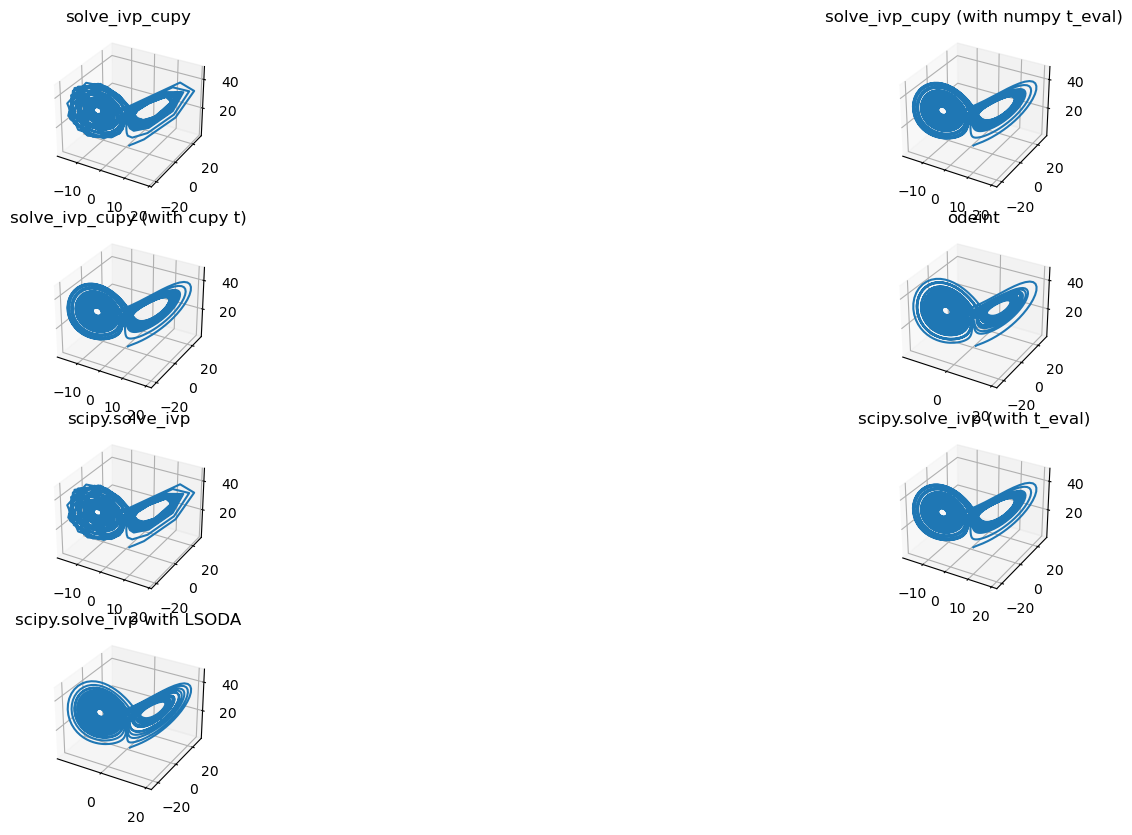

In [1]:
import numpy as np
import cupy as cu
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import time

from scipy.integrate import odeint, solve_ivp
from scipy.integrate._ivp.ivp import OdeResult

from scipy_cupy.ivp import solve_ivp as solve_ivp_cupy
from scipy_cupy.ivp.ivp import OdeResult as OdeResultCupyCustom
 
# init plotter and helper runner func
fig = plt.figure(figsize=(20, 10))
nrows = 4
ncols = 2
fig_index = 0
def run_and_plot(name, fun):
    global fig_index, fig, nrows, ncols
    
    start_t = time.time()
    res = fun()
    end_t = time.time()
    print(f'{name} took {end_t-start_t}s')

    fig_index += 1
    ax = fig.add_subplot(nrows, ncols, fig_index, projection='3d')
    if (isinstance(res, np.ndarray)):
        ax.plot(res[:, 0],
                res[:, 1],
                res[:, 2])
    if (isinstance(res, OdeResult)):
        ax.plot(res.y[0, :],
                res.y[1, :],
                res.y[2, :])
    if (isinstance(res, OdeResultCupyCustom)):
        if (hasattr(res.y[0, :], 'get')):
            ax.plot(res.y[0, :].get(),
                    res.y[1, :].get(),
                    res.y[2, :].get())
        else:
            ax.plot(res.y[0, :],
                    res.y[1, :],
                    res.y[2, :])
    ax.set_title(name)
    

def lorenz(t, state, sigma, beta, rho):
    x, y, z = state
     
    dx = sigma * (y - x)
    dy = x * (rho - z) - y
    dz = x * y - beta * z
     
    return [dx, dy, dz]
 
sigma = 10.0
beta = 8.0 / 3.0
rho = 28.0
 
p = (sigma, beta, rho)  # Parameters of the system
y0 = [1.0, 1.0, 1.0]  # Initial state of the system
t_span = (0.0, 40.0)
t = np.arange(0.0, 40.0, 0.01) # numpy t
t_cupy = cu.arange(0.0, 40.0, 0.01) # cupy t
 
run_and_plot("solve_ivp_cupy", lambda: solve_ivp_cupy(lorenz, t_span, y0, args=p))
run_and_plot("solve_ivp_cupy (with numpy t_eval)", lambda: solve_ivp_cupy(lorenz, t_span, y0, args=p, t_eval=t))
run_and_plot("solve_ivp_cupy (with cupy t)", lambda: solve_ivp_cupy(lorenz, t_span, y0, args=p, t_eval=t_cupy))

run_and_plot("odeint", lambda: odeint(lorenz, y0, t, p, tfirst=True))
run_and_plot("scipy.solve_ivp", lambda: solve_ivp(lorenz, t_span, y0, args=p))
run_and_plot("scipy.solve_ivp (with t_eval)", lambda: solve_ivp(lorenz, t_span, y0, args=p, t_eval=t))
run_and_plot("scipy.solve_ivp with LSODA", lambda:solve_ivp(lorenz, t_span, y0, args=p, t_eval=t, method='LSODA'))
